In [145]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
tem17 = pd.read_csv("data/2017기온데이터_전처리.csv").drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)
tem17

날짜     시간  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0     2017-01-01   0:00     0.2      0.0      2.2   79.0
1     2017-01-01   1:00     0.0      0.0      1.4   78.0
2     2017-01-01   2:00    -0.3      0.0      1.9   81.0
3     2017-01-01   3:00    -0.7      0.0      2.0   84.0
4     2017-01-01   4:00    -1.1      0.0      1.6   85.0
...          ...    ...     ...      ...      ...    ...
8755  2017-12-31  19:00     0.0      0.0      2.2   31.0
8756  2017-12-31  20:00    -1.0      0.0      0.9   32.0
8757  2017-12-31  21:00    -1.6      0.0      1.0   35.0
8758  2017-12-31  22:00    -2.1      0.0      1.7   36.0
8759  2017-12-31  23:00    -2.6      0.0      0.6   40.0

[8760 rows x 6 columns]

In [147]:
tem21 = pd.read_csv("data/2021기온데이터_전처리.csv").drop(['Unnamed: 0'], axis=1)
tem21

날짜     시간  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0     2021-01-01  00:00    -8.3      0.0      1.8   66.0
1     2021-01-01  01:00    -8.7      0.0      2.4   68.0
2     2021-01-01  02:00    -9.1      0.0      1.6   69.0
3     2021-01-01  03:00    -9.3      0.0      1.1   70.0
4     2021-01-01  04:00    -9.3      0.0      0.3   71.0
...          ...    ...     ...      ...      ...    ...
8755  2021-12-31  19:00    -6.4      0.0      2.2   34.0
8756  2021-12-31  20:00    -6.3      0.0      4.1   35.0
8757  2021-12-31  21:00    -6.7      0.0      4.8   36.0
8758  2021-12-31  22:00    -7.5      0.0      3.0   37.0
8759  2021-12-31  23:00    -7.7      0.0      2.9   38.0

[8760 rows x 6 columns]

In [148]:
elec = pd.read_csv("data/fintime1721_df.csv")

In [149]:
elec.loc[8759]

날짜     2017-12-31
시간          23:00
수요량         61400
Name: 8759, dtype: object

In [150]:
elec17 = elec.loc[:8759]
elec17

날짜     시간    수요량
0     2017-01-01  00:00  59177
1     2017-01-01  01:00  59234
2     2017-01-01  02:00  56664
3     2017-01-01  03:00  54641
4     2017-01-01  04:00  53749
...          ...    ...    ...
8755  2017-12-31  19:00  60937
8756  2017-12-31  20:00  60807
8757  2017-12-31  21:00  60454
8758  2017-12-31  22:00  60127
8759  2017-12-31  23:00  61400

[8760 rows x 3 columns]

In [151]:
elec21 = elec.loc[8760:]
elec21 = elec21.reset_index().drop('index', axis=1)
elec21

날짜     시간    수요량
0     2021-01-01  00:00  63055
1     2021-01-01  01:00  64942
2     2021-01-01  02:00  62593
3     2021-01-01  03:00  60905
4     2021-01-01  04:00  59889
...          ...    ...    ...
8755  2021-12-31  19:00  74578
8756  2021-12-31  20:00  72976
8757  2021-12-31  21:00  71602
8758  2021-12-31  22:00  69383
8759  2021-12-31  23:00  68874

[8760 rows x 3 columns]

In [152]:
elec17.drop(['날짜'], axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_2004\3024197028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elec17.drop(['날짜'], axis=1, inplace=True)


In [153]:
tem17.drop(['시간'], axis=1, inplace=True)

In [156]:
fin17 = pd.concat([tem17,elec17],axis=1)
# fin17.drop(['Unnamed: 0'], axis=1, inplace=True)
fin17

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0     2017-01-01     0.2      0.0      2.2   79.0  00:00  59177
1     2017-01-01     0.0      0.0      1.4   78.0  01:00  59234
2     2017-01-01    -0.3      0.0      1.9   81.0  02:00  56664
3     2017-01-01    -0.7      0.0      2.0   84.0  03:00  54641
4     2017-01-01    -1.1      0.0      1.6   85.0  04:00  53749
...          ...     ...      ...      ...    ...    ...    ...
8755  2017-12-31     0.0      0.0      2.2   31.0  19:00  60937
8756  2017-12-31    -1.0      0.0      0.9   32.0  20:00  60807
8757  2017-12-31    -1.6      0.0      1.0   35.0  21:00  60454
8758  2017-12-31    -2.1      0.0      1.7   36.0  22:00  60127
8759  2017-12-31    -2.6      0.0      0.6   40.0  23:00  61400

[8760 rows x 7 columns]

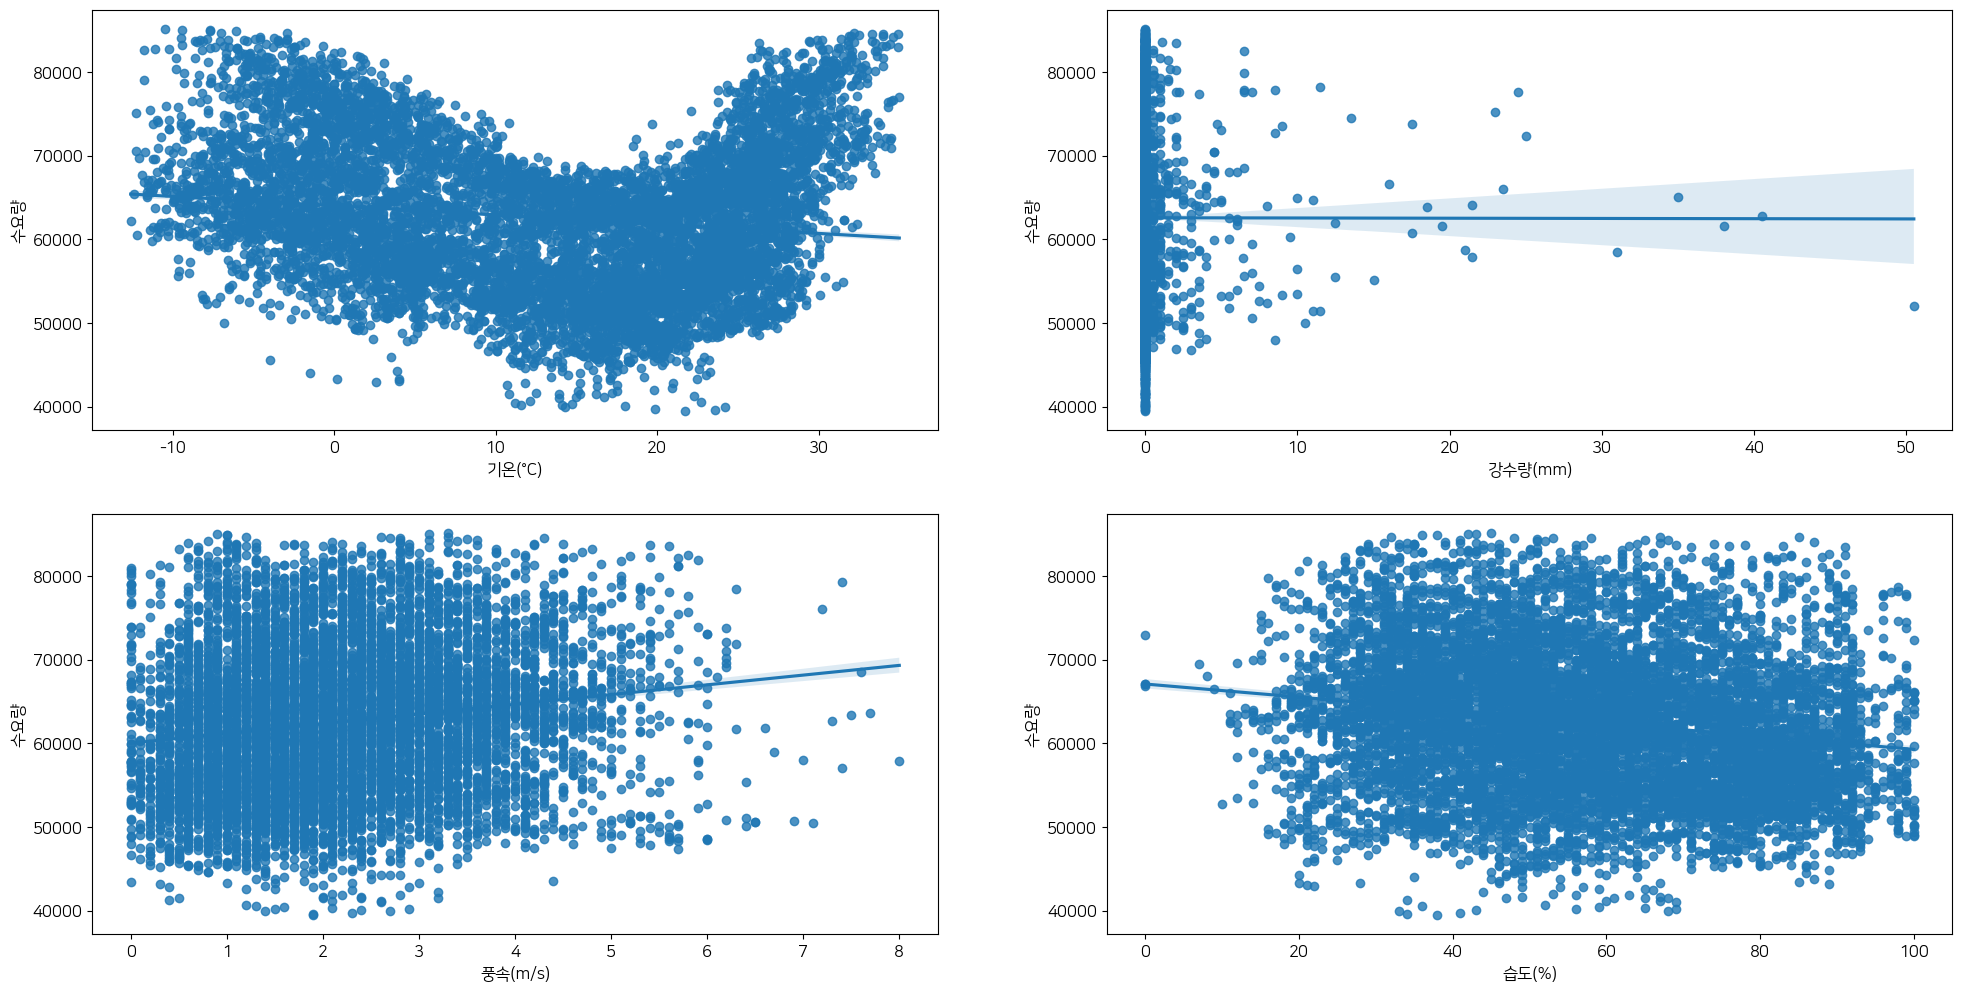

In [157]:
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin17, ax=axs[row][col])

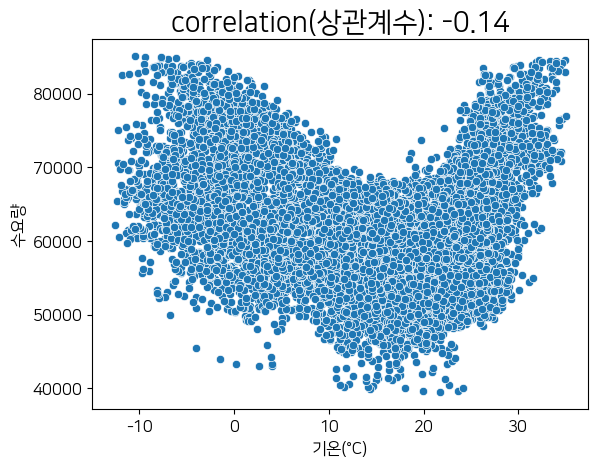

In [159]:
correlation = fin17['수요량'].corr(fin17['기온(°C)'])
sns.scatterplot(x=fin17['기온(°C)'], y=fin17['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [160]:
elec21.drop(['날짜'], axis=1, inplace=True)

In [161]:
tem21.drop(['시간'], axis=1, inplace=True)

In [162]:
fin21 = pd.concat([tem21,elec21],axis=1)
# fin21.drop(['Unnamed: 0'], axis=1, inplace=True)
fin21

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0     2021-01-01    -8.3      0.0      1.8   66.0  00:00  63055
1     2021-01-01    -8.7      0.0      2.4   68.0  01:00  64942
2     2021-01-01    -9.1      0.0      1.6   69.0  02:00  62593
3     2021-01-01    -9.3      0.0      1.1   70.0  03:00  60905
4     2021-01-01    -9.3      0.0      0.3   71.0  04:00  59889
...          ...     ...      ...      ...    ...    ...    ...
8755  2021-12-31    -6.4      0.0      2.2   34.0  19:00  74578
8756  2021-12-31    -6.3      0.0      4.1   35.0  20:00  72976
8757  2021-12-31    -6.7      0.0      4.8   36.0  21:00  71602
8758  2021-12-31    -7.5      0.0      3.0   37.0  22:00  69383
8759  2021-12-31    -7.7      0.0      2.9   38.0  23:00  68874

[8760 rows x 7 columns]

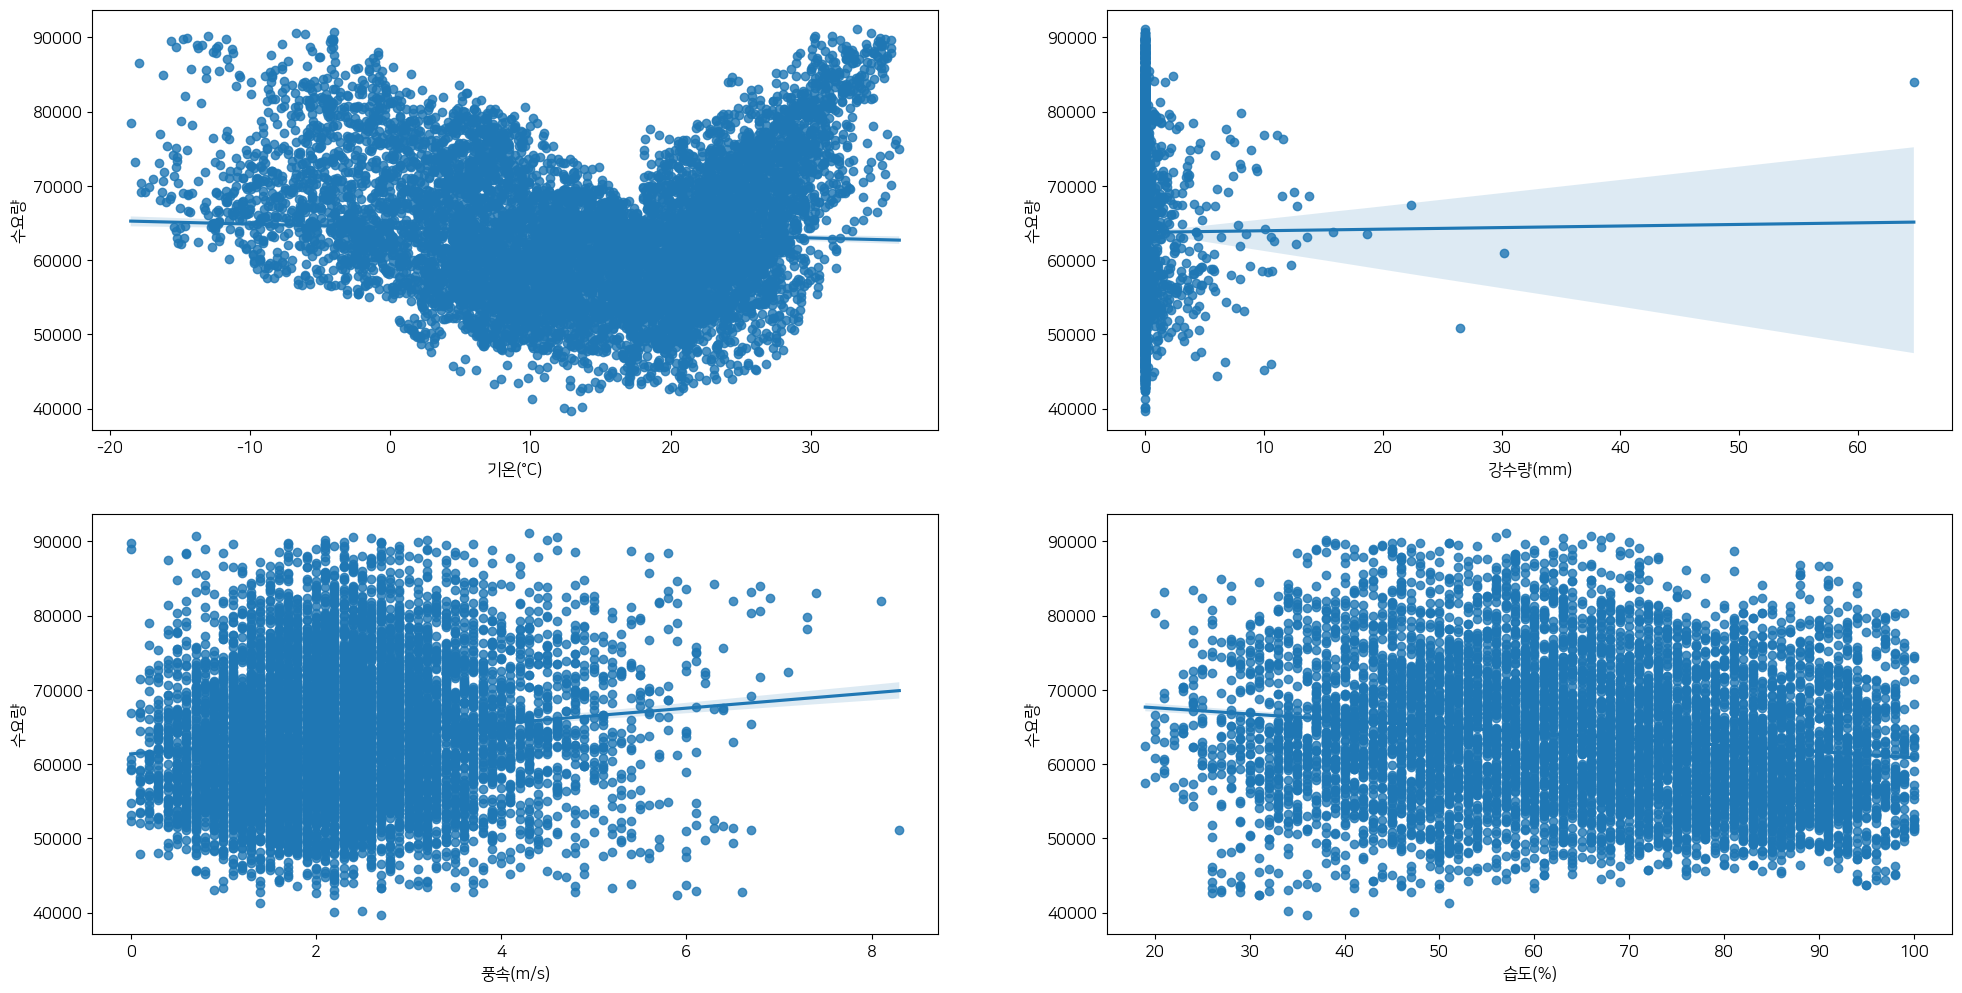

In [163]:
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin21, ax=axs[row][col])

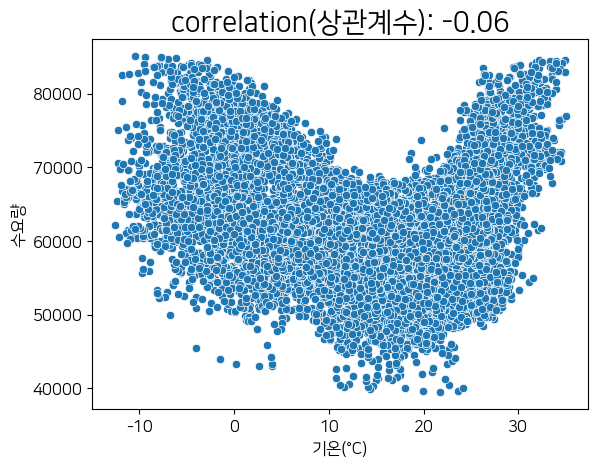

In [164]:
correlation = fin21['수요량'].corr(fin21['기온(°C)'])
sns.scatterplot(x=fin17['기온(°C)'], y=fin17['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [116]:
tem1 = pd.read_csv("data/기온데이터_병합.csv")
tem1

Unnamed: 0          날짜     시간  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0               0  2017-01-01   0:00     0.2      0.0      2.2   79.0
1               1  2017-01-01   1:00     0.0      0.0      1.4   78.0
2               2  2017-01-01   2:00    -0.3      0.0      1.9   81.0
3               3  2017-01-01   3:00    -0.7      0.0      2.0   84.0
4               4  2017-01-01   4:00    -1.1      0.0      1.6   85.0
...           ...         ...    ...     ...      ...      ...    ...
17515        8755  2021-12-31  19:00    -6.4      0.0      2.2   34.0
17516        8756  2021-12-31  20:00    -6.3      0.0      4.1   35.0
17517        8757  2021-12-31  21:00    -6.7      0.0      4.8   36.0
17518        8758  2021-12-31  22:00    -7.5      0.0      3.0   37.0
17519        8759  2021-12-31  23:00    -7.7      0.0      2.9   38.0

[17520 rows x 7 columns]

In [46]:
elec1 = pd.read_csv("data/fintime1721_df.csv")
elec1

날짜     시간    수요량
0      2017-01-01  00:00  59177
1      2017-01-01  01:00  59234
2      2017-01-01  02:00  56664
3      2017-01-01  03:00  54641
4      2017-01-01  04:00  53749
...           ...    ...    ...
17515  2021-12-31  19:00  74578
17516  2021-12-31  20:00  72976
17517  2021-12-31  21:00  71602
17518  2021-12-31  22:00  69383
17519  2021-12-31  23:00  68874

[17520 rows x 3 columns]

In [47]:
elec1.drop(['날짜'], axis=1, inplace=True)

In [49]:
tem1.drop(['Unnamed: 0','시간'], axis=1, inplace=True)

In [50]:
fin1 = pd.concat([tem1,elec1],axis=1)
fin1

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0      2017-01-01     0.2      0.0      2.2   79.0  00:00  59177
1      2017-01-01     0.0      0.0      1.4   78.0  01:00  59234
2      2017-01-01    -0.3      0.0      1.9   81.0  02:00  56664
3      2017-01-01    -0.7      0.0      2.0   84.0  03:00  54641
4      2017-01-01    -1.1      0.0      1.6   85.0  04:00  53749
...           ...     ...      ...      ...    ...    ...    ...
17515  2021-12-31    -6.4      0.0      2.2   34.0  19:00  74578
17516  2021-12-31    -6.3      0.0      4.1   35.0  20:00  72976
17517  2021-12-31    -6.7      0.0      4.8   36.0  21:00  71602
17518  2021-12-31    -7.5      0.0      3.0   37.0  22:00  69383
17519  2021-12-31    -7.7      0.0      2.9   38.0  23:00  68874

[17520 rows x 7 columns]

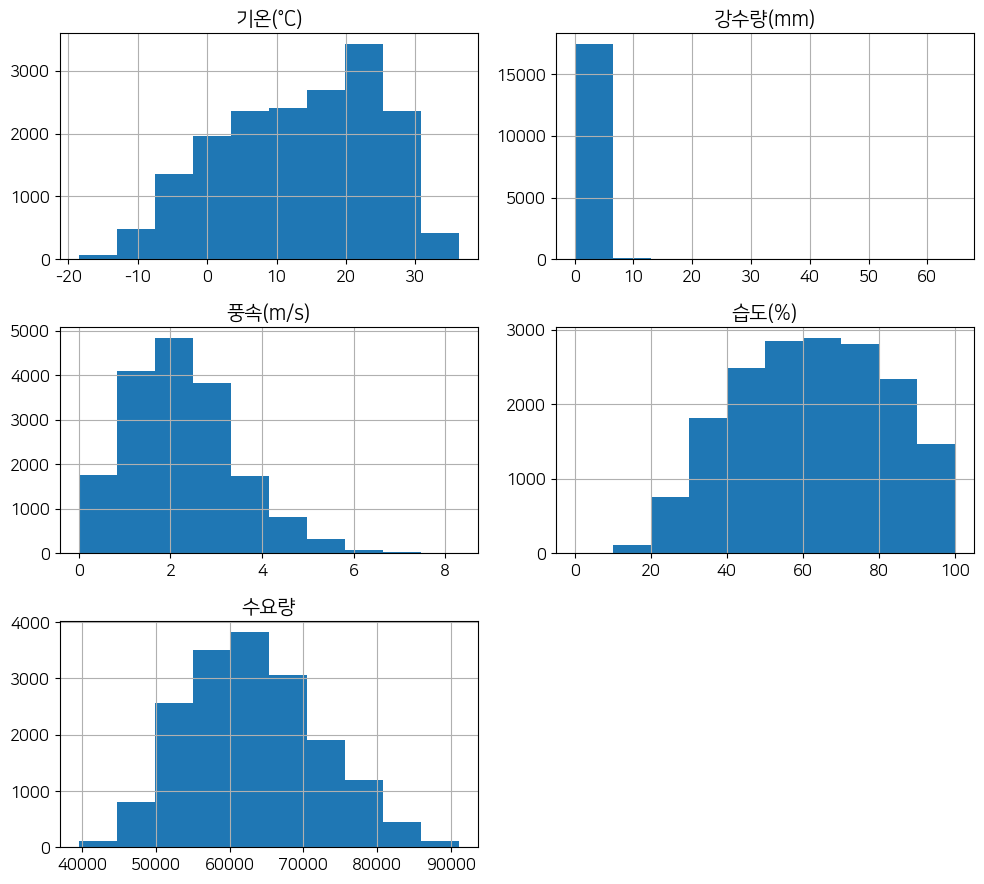

In [51]:
fin1.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

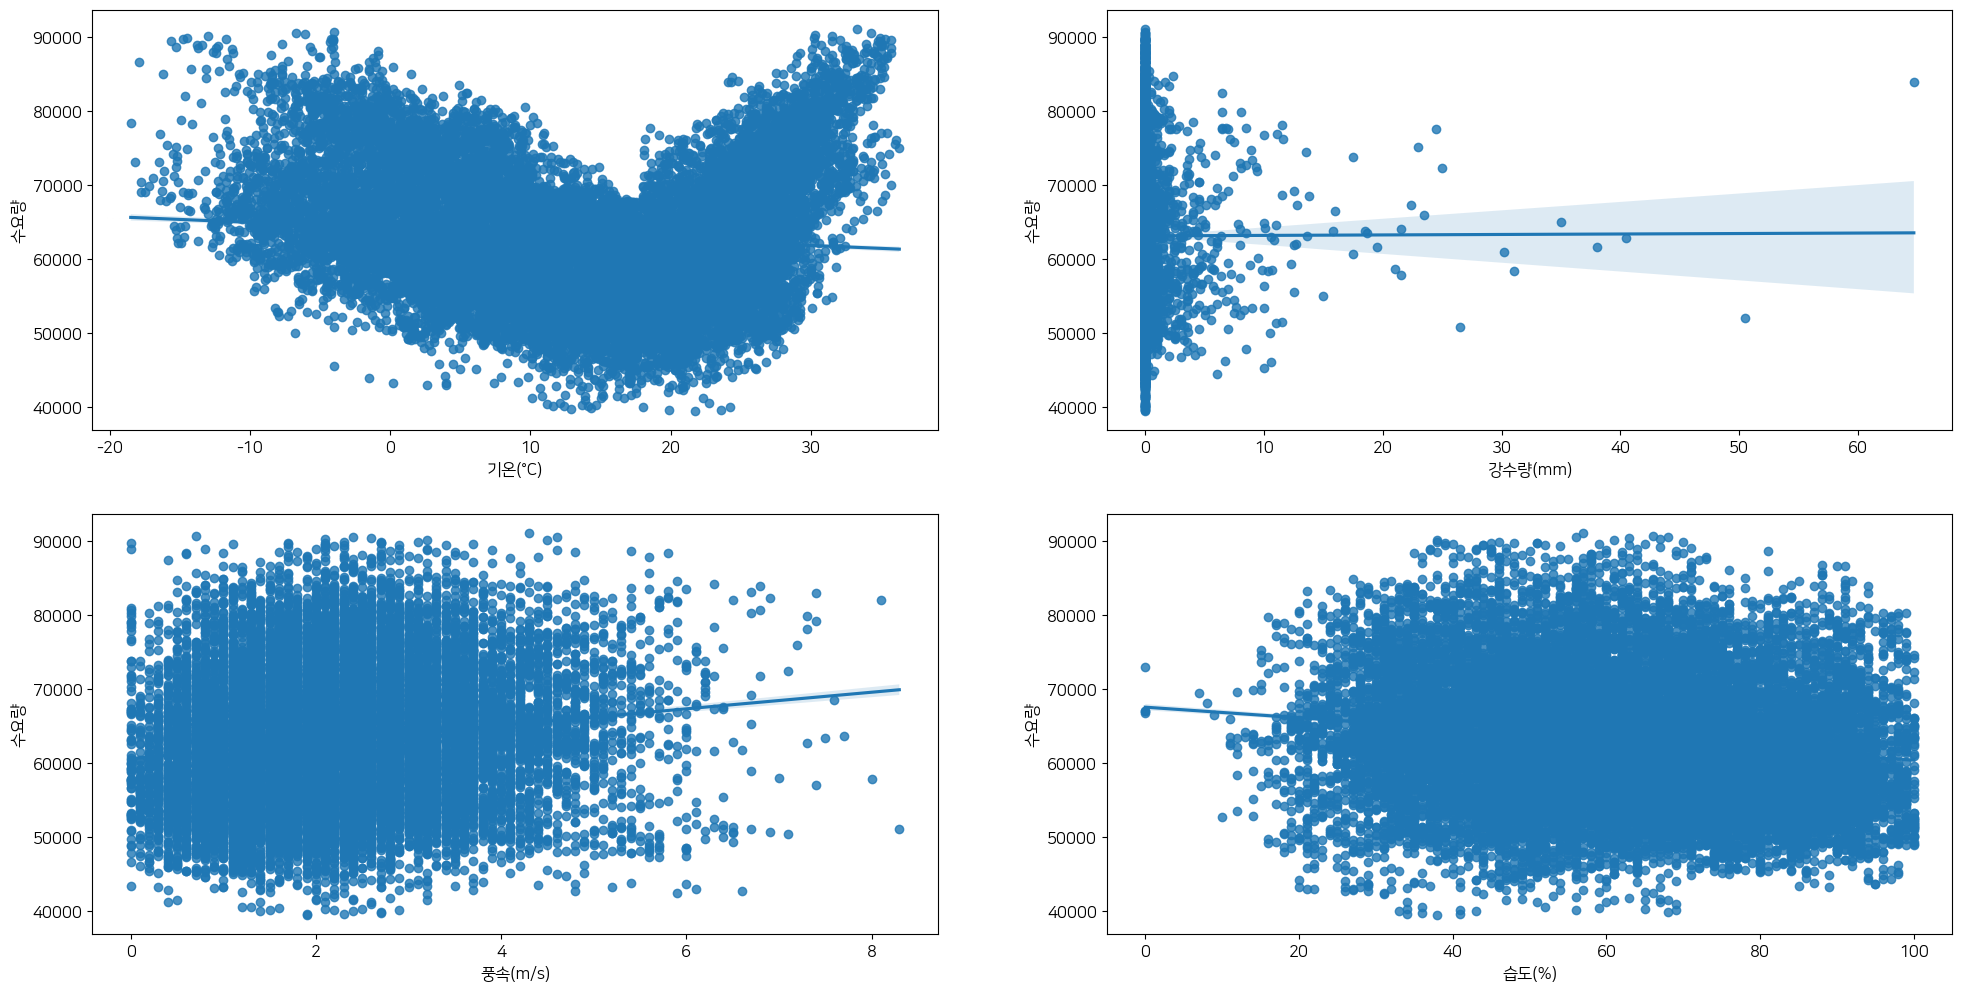

In [77]:
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin1, ax=axs[row][col])

In [78]:
y = fin1['수요량']
x = fin1.drop(columns=['수요량'])

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [80]:
x_train, x_test, y_train, y_test

(               날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간
 14694  2021-09-05    19.5      0.0      3.2   70.0  06:00
 3633   2017-06-01    23.2      0.0      1.8   66.0  09:00
 16387  2021-11-14    12.3      0.0      1.9   68.0  19:00
 12824  2021-06-19    19.3      0.0      1.4   91.0  08:00
 16844  2021-12-03     0.2      0.0      3.4   48.0  20:00
 ...           ...     ...      ...      ...    ...    ...
 15539  2021-10-10    23.7      0.0      3.2   82.0  11:00
 990    2017-02-11    -9.1      0.0      2.0   53.0  06:00
 15850  2021-10-23    11.9      0.0      1.5   62.0  10:00
 7952   2017-11-28     2.2      0.0      0.7   64.0  08:00
 6731   2017-10-08    25.6      0.0      2.0   56.0  11:00
 
 [12264 rows x 6 columns],
                날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간
 3894   2017-06-12    17.0      0.0      2.8   51.0  06:00
 8918   2021-01-07   -12.4      0.0      4.4   40.0  14:00
 10307  2021-03-06    10.3      0.0      3.0   63.0  11:00
 2380   2017-04-10    11.2 

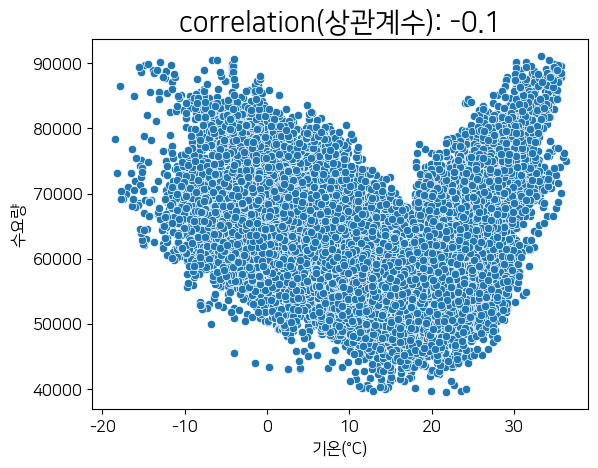

In [83]:
correlation = fin1['수요량'].corr(fin1['기온(°C)'])
sns.scatterplot(x=fin1['기온(°C)'], y=fin1['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

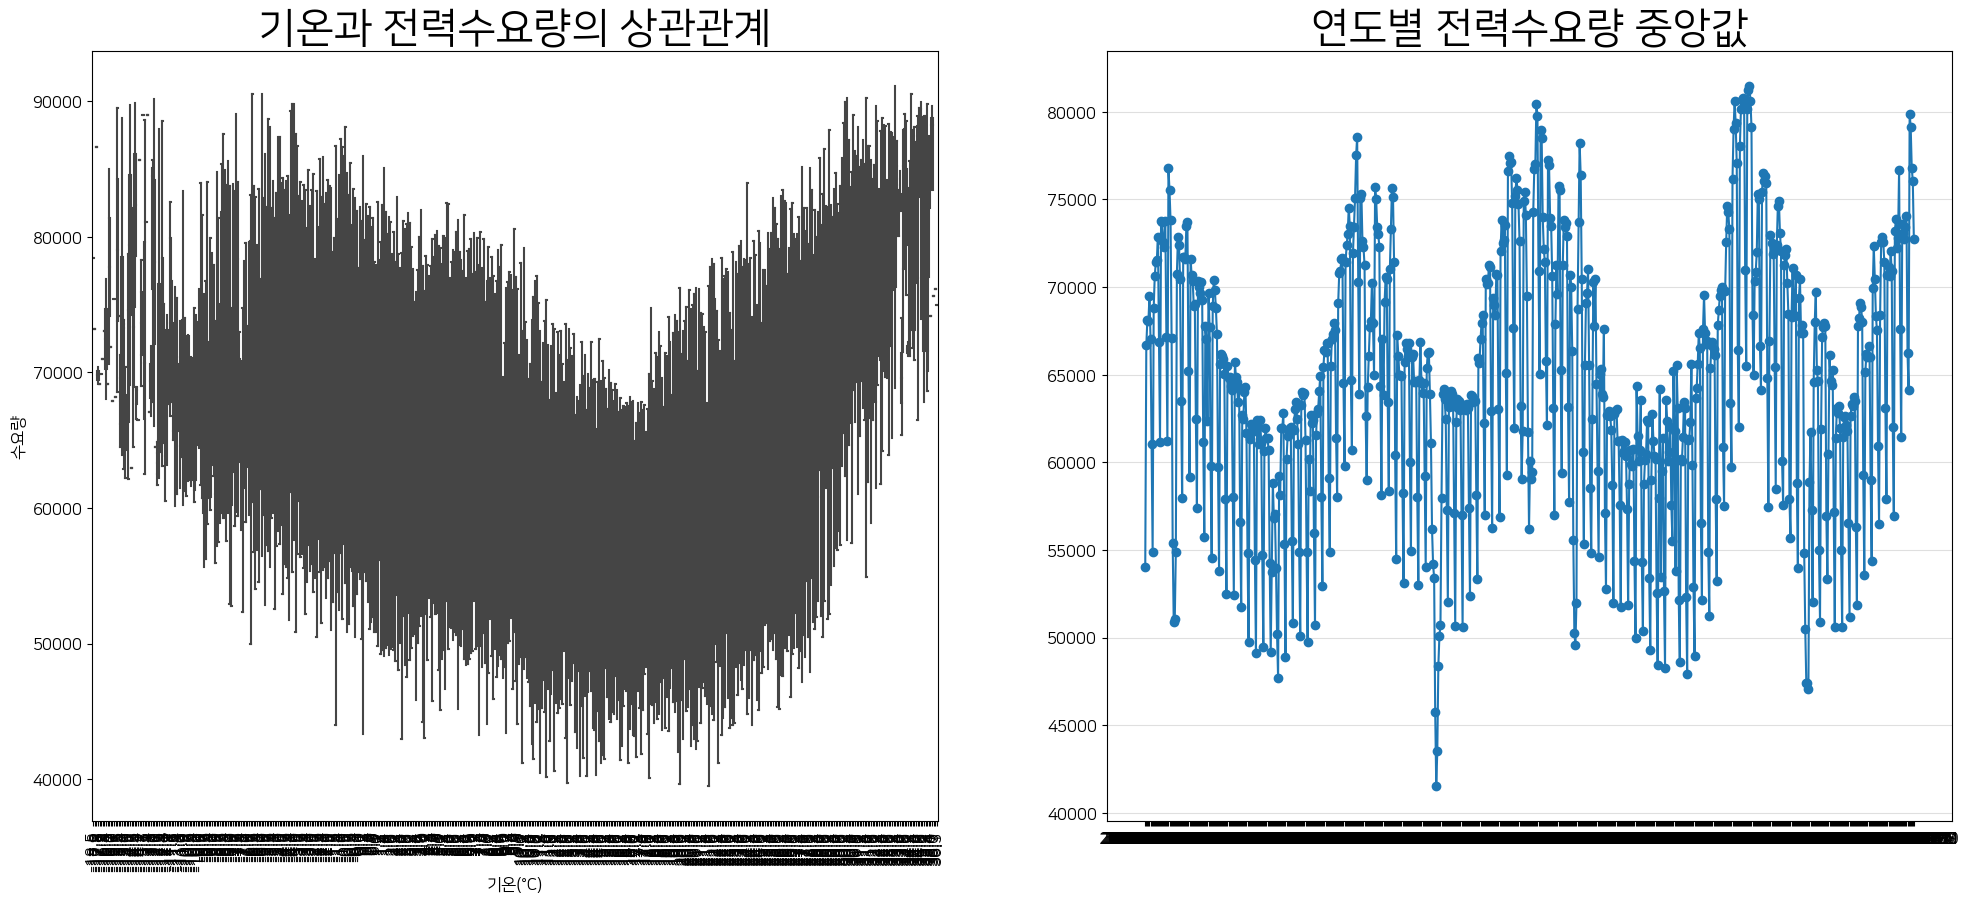

In [169]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="기온(°C)", y="수요량", data=fin1, showfliers=False)
g.set_title('기온과 전력수요량의 상관관계', size = 30)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.subplot(1,2,2)
plt.plot(fin1.groupby('날짜')['수요량'].median(), marker='o')
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.title('연도별 전력수요량 중앙값', size = 30)
plt.show()

In [255]:
tem1721 = pd.read_csv("data/5년기온데이터_전처리.csv").drop(['Unnamed: 0'], axis=1)
tem1721

날짜     시간  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0      2017-01-01   0:00     0.2      0.0      2.2   79.0
1      2017-01-01   1:00     0.0      0.0      1.4   78.0
2      2017-01-01   2:00    -0.3      0.0      1.9   81.0
3      2017-01-01   3:00    -0.7      0.0      2.0   84.0
4      2017-01-01   4:00    -1.1      0.0      1.6   85.0
...           ...    ...     ...      ...      ...    ...
43819  2021-12-31  19:00    -6.4      0.0      2.2   34.0
43820  2021-12-31  20:00    -6.3      0.0      4.1   35.0
43821  2021-12-31  21:00    -6.7      0.0      4.8   36.0
43822  2021-12-31  22:00    -7.5      0.0      3.0   37.0
43823  2021-12-31  23:00    -7.7      0.0      2.9   38.0

[43824 rows x 6 columns]

In [254]:
elec1721 = pd.read_csv("data/fintime17_21_df.csv")
elec1721

날짜     시간    수요량
0      2017-01-01  00:00  59177
1      2017-01-01  01:00  59234
2      2017-01-01  02:00  56664
3      2017-01-01  03:00  54641
4      2017-01-01  04:00  53749
...           ...    ...    ...
43819  2021-12-31  19:00  74578
43820  2021-12-31  20:00  72976
43821  2021-12-31  21:00  71602
43822  2021-12-31  22:00  69383
43823  2021-12-31  23:00  68874

[43824 rows x 3 columns]

In [256]:
tem1721.drop(['시간'], axis=1, inplace=True)
elec1721.drop(['날짜'], axis=1, inplace=True)

In [257]:
fin1721 = pd.concat([tem1721,elec1721],axis=1)
fin1721

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0      2017-01-01     0.2      0.0      2.2   79.0  00:00  59177
1      2017-01-01     0.0      0.0      1.4   78.0  01:00  59234
2      2017-01-01    -0.3      0.0      1.9   81.0  02:00  56664
3      2017-01-01    -0.7      0.0      2.0   84.0  03:00  54641
4      2017-01-01    -1.1      0.0      1.6   85.0  04:00  53749
...           ...     ...      ...      ...    ...    ...    ...
43819  2021-12-31    -6.4      0.0      2.2   34.0  19:00  74578
43820  2021-12-31    -6.3      0.0      4.1   35.0  20:00  72976
43821  2021-12-31    -6.7      0.0      4.8   36.0  21:00  71602
43822  2021-12-31    -7.5      0.0      3.0   37.0  22:00  69383
43823  2021-12-31    -7.7      0.0      2.9   38.0  23:00  68874

[43824 rows x 7 columns]

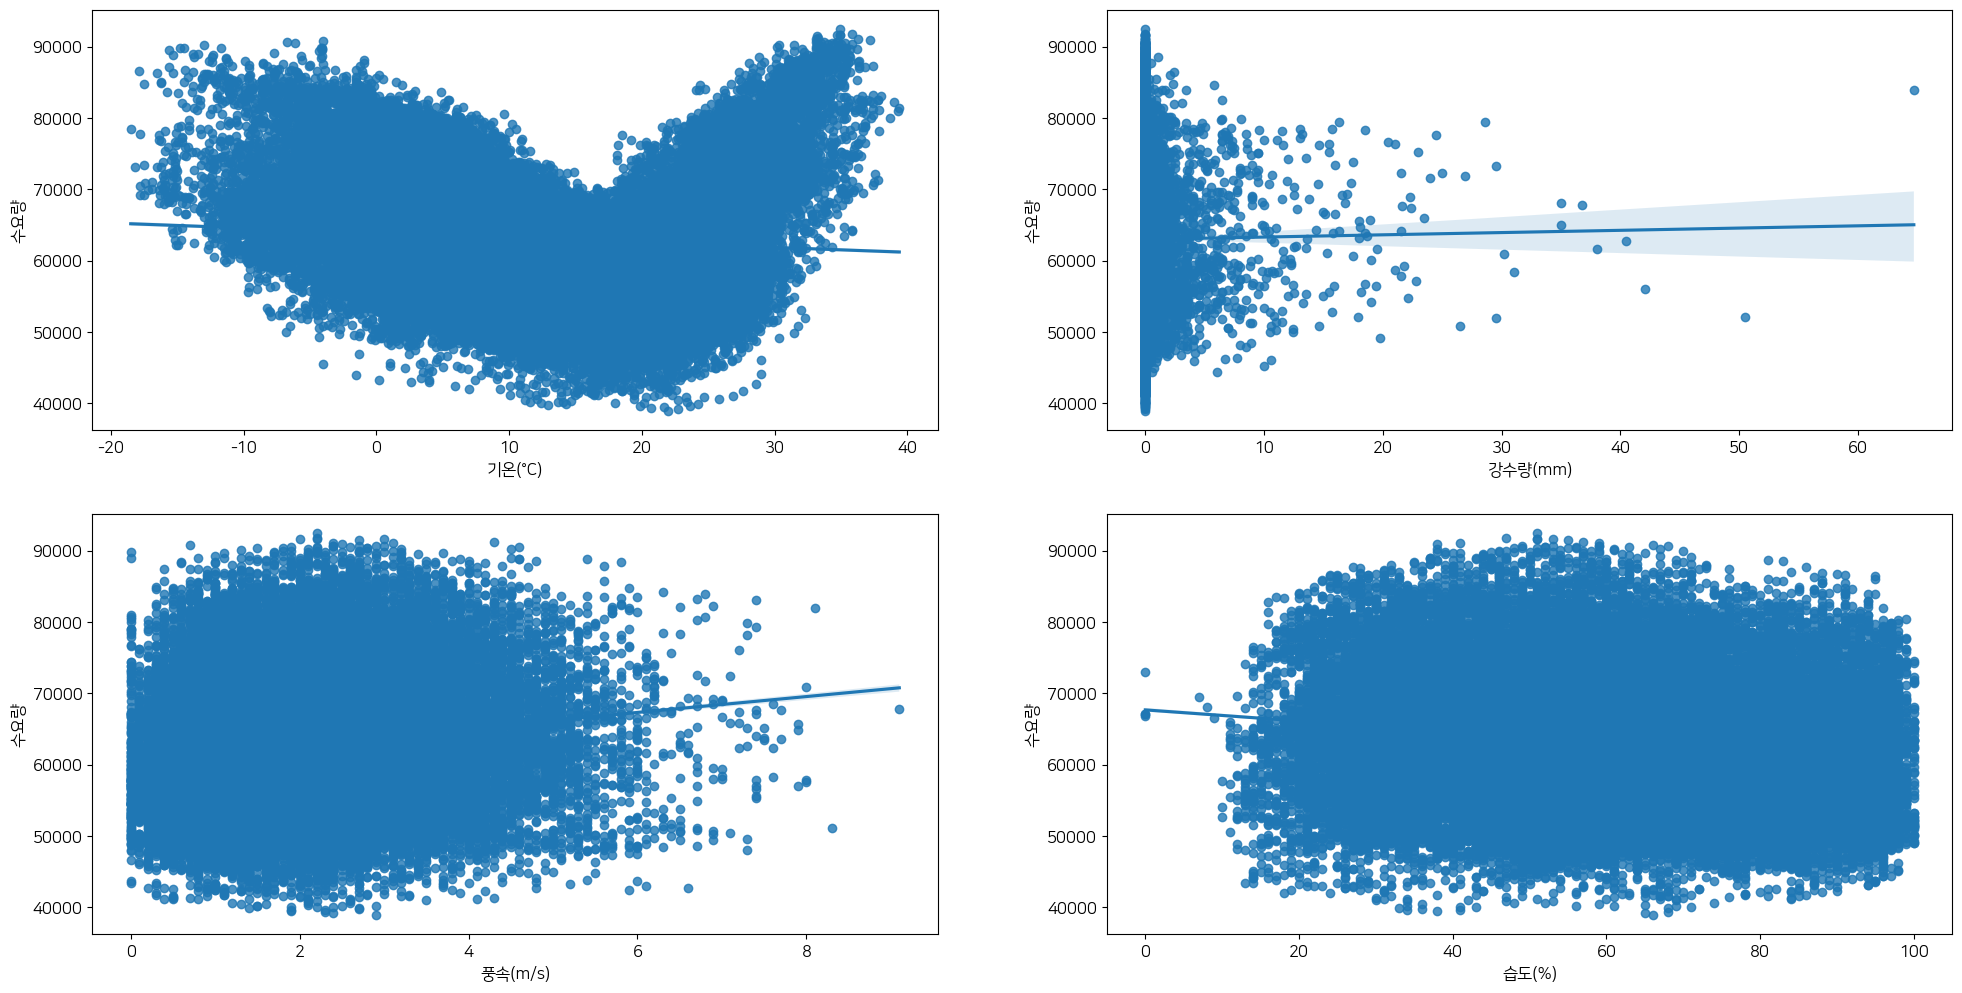

In [258]:
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin1721, ax=axs[row][col])

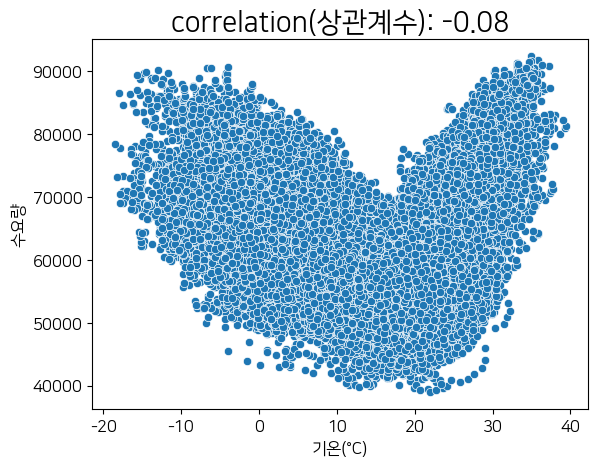

In [259]:
correlation = fin1721['수요량'].corr(fin1721['기온(°C)'])
sns.scatterplot(x=fin1721['기온(°C)'], y=fin1721['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [277]:
tem1721sum = tem1721[tem1721['날짜'].str.contains(
    "2017-04|2017-05|2017-06|2017-07|2017-08|2017-09|2018-04|2018-05|2018-06|2018-07|2018-08|2018-09|2019-04|2019-05|2019-06|2019-07|2019-08|2019-09|2020-04|2020-05|2020-06|2020-07|2020-08|2020-09|2021-04|2021-05|2021-06|2021-07|2021-08|2021-09")].reset_index()
tem1721sum.drop('index',axis=1, inplace=True)
tem1721sum

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0      2017-04-01     4.9      0.0      1.5   81.0
1      2017-04-01     5.1      0.0      1.3   77.0
2      2017-04-01     5.7      0.0      0.8   74.0
3      2017-04-01     5.7      0.0      0.6   77.0
4      2017-04-01     5.5      0.0      0.5   78.0
...           ...     ...      ...      ...    ...
21955  2021-09-30    22.7      0.0      0.2   71.0
21956  2021-09-30    21.7      0.0      0.9   79.0
21957  2021-09-30    20.9      0.0      0.4   83.0
21958  2021-09-30    20.4      0.0      0.8   81.0
21959  2021-09-30    19.7      0.0      1.4   81.0

[21960 rows x 5 columns]

In [278]:
tem1721win = tem1721[~tem1721['날짜'].str.contains(
    "2017-04|2017-05|2017-06|2017-07|2017-08|2017-09|2018-04|2018-05|2018-06|2018-07|2018-08|2018-09|2019-04|2019-05|2019-06|2019-07|2019-08|2019-09|2020-04|2020-05|2020-06|2020-07|2020-08|2020-09|2021-04|2021-05|2021-06|2021-07|2021-08|2021-09")].reset_index()
tem1721win.drop('index',axis=1, inplace=True)

In [279]:
tem1721win

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
0      2017-01-01     0.2      0.0      2.2   79.0
1      2017-01-01     0.0      0.0      1.4   78.0
2      2017-01-01    -0.3      0.0      1.9   81.0
3      2017-01-01    -0.7      0.0      2.0   84.0
4      2017-01-01    -1.1      0.0      1.6   85.0
...           ...     ...      ...      ...    ...
21859  2021-12-31    -6.4      0.0      2.2   34.0
21860  2021-12-31    -6.3      0.0      4.1   35.0
21861  2021-12-31    -6.7      0.0      4.8   36.0
21862  2021-12-31    -7.5      0.0      3.0   37.0
21863  2021-12-31    -7.7      0.0      2.9   38.0

[21864 rows x 5 columns]

In [271]:
elec1721_=pd.read_csv("data/fintime17_21_df.csv")
elec1721_

날짜     시간    수요량
0      2017-01-01  00:00  59177
1      2017-01-01  01:00  59234
2      2017-01-01  02:00  56664
3      2017-01-01  03:00  54641
4      2017-01-01  04:00  53749
...           ...    ...    ...
43819  2021-12-31  19:00  74578
43820  2021-12-31  20:00  72976
43821  2021-12-31  21:00  71602
43822  2021-12-31  22:00  69383
43823  2021-12-31  23:00  68874

[43824 rows x 3 columns]

In [274]:
elec1721sum = elec1721_[elec1721_['날짜'].str.contains(
    "2017-04|2017-05|2017-06|2017-07|2017-08|2017-09|2018-04|2018-05|2018-06|2018-07|2018-08|2018-09|2019-04|2019-05|2019-06|2019-07|2019-08|2019-09|2020-04|2020-05|2020-06|2020-07|2020-08|2020-09|2021-04|2021-05|2021-06|2021-07|2021-08|2021-09")].reset_index()
elec1721sum.drop('index',axis=1, inplace=True)
elec1721sum

날짜     시간    수요량
0      2017-04-01  00:00  59219
1      2017-04-01  01:00  59172
2      2017-04-01  02:00  56432
3      2017-04-01  03:00  54927
4      2017-04-01  04:00  54311
...           ...    ...    ...
21955  2021-09-30  19:00  72707
21956  2021-09-30  20:00  71174
21957  2021-09-30  21:00  68459
21958  2021-09-30  22:00  65543
21959  2021-09-30  23:00  62518

[21960 rows x 3 columns]

In [276]:
elec1721win = elec1721_[~elec1721_['날짜'].str.contains(
    "2017-04|2017-05|2017-06|2017-07|2017-08|2017-09|2018-04|2018-05|2018-06|2018-07|2018-08|2018-09|2019-04|2019-05|2019-06|2019-07|2019-08|2019-09|2020-04|2020-05|2020-06|2020-07|2020-08|2020-09|2021-04|2021-05|2021-06|2021-07|2021-08|2021-09")].reset_index()
elec1721win.drop('index',axis=1, inplace=True)
elec1721win

날짜     시간    수요량
0      2017-01-01  00:00  59177
1      2017-01-01  01:00  59234
2      2017-01-01  02:00  56664
3      2017-01-01  03:00  54641
4      2017-01-01  04:00  53749
...           ...    ...    ...
21859  2021-12-31  19:00  74578
21860  2021-12-31  20:00  72976
21861  2021-12-31  21:00  71602
21862  2021-12-31  22:00  69383
21863  2021-12-31  23:00  68874

[21864 rows x 3 columns]

In [281]:
elec1721sum.drop(['날짜'], axis=1, inplace=True)

In [282]:
fin1721sum = pd.concat([tem1721sum,elec1721sum],axis=1)
fin1721sum

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0      2017-04-01     4.9      0.0      1.5   81.0  00:00  59219
1      2017-04-01     5.1      0.0      1.3   77.0  01:00  59172
2      2017-04-01     5.7      0.0      0.8   74.0  02:00  56432
3      2017-04-01     5.7      0.0      0.6   77.0  03:00  54927
4      2017-04-01     5.5      0.0      0.5   78.0  04:00  54311
...           ...     ...      ...      ...    ...    ...    ...
21955  2021-09-30    22.7      0.0      0.2   71.0  19:00  72707
21956  2021-09-30    21.7      0.0      0.9   79.0  20:00  71174
21957  2021-09-30    20.9      0.0      0.4   83.0  21:00  68459
21958  2021-09-30    20.4      0.0      0.8   81.0  22:00  65543
21959  2021-09-30    19.7      0.0      1.4   81.0  23:00  62518

[21960 rows x 7 columns]

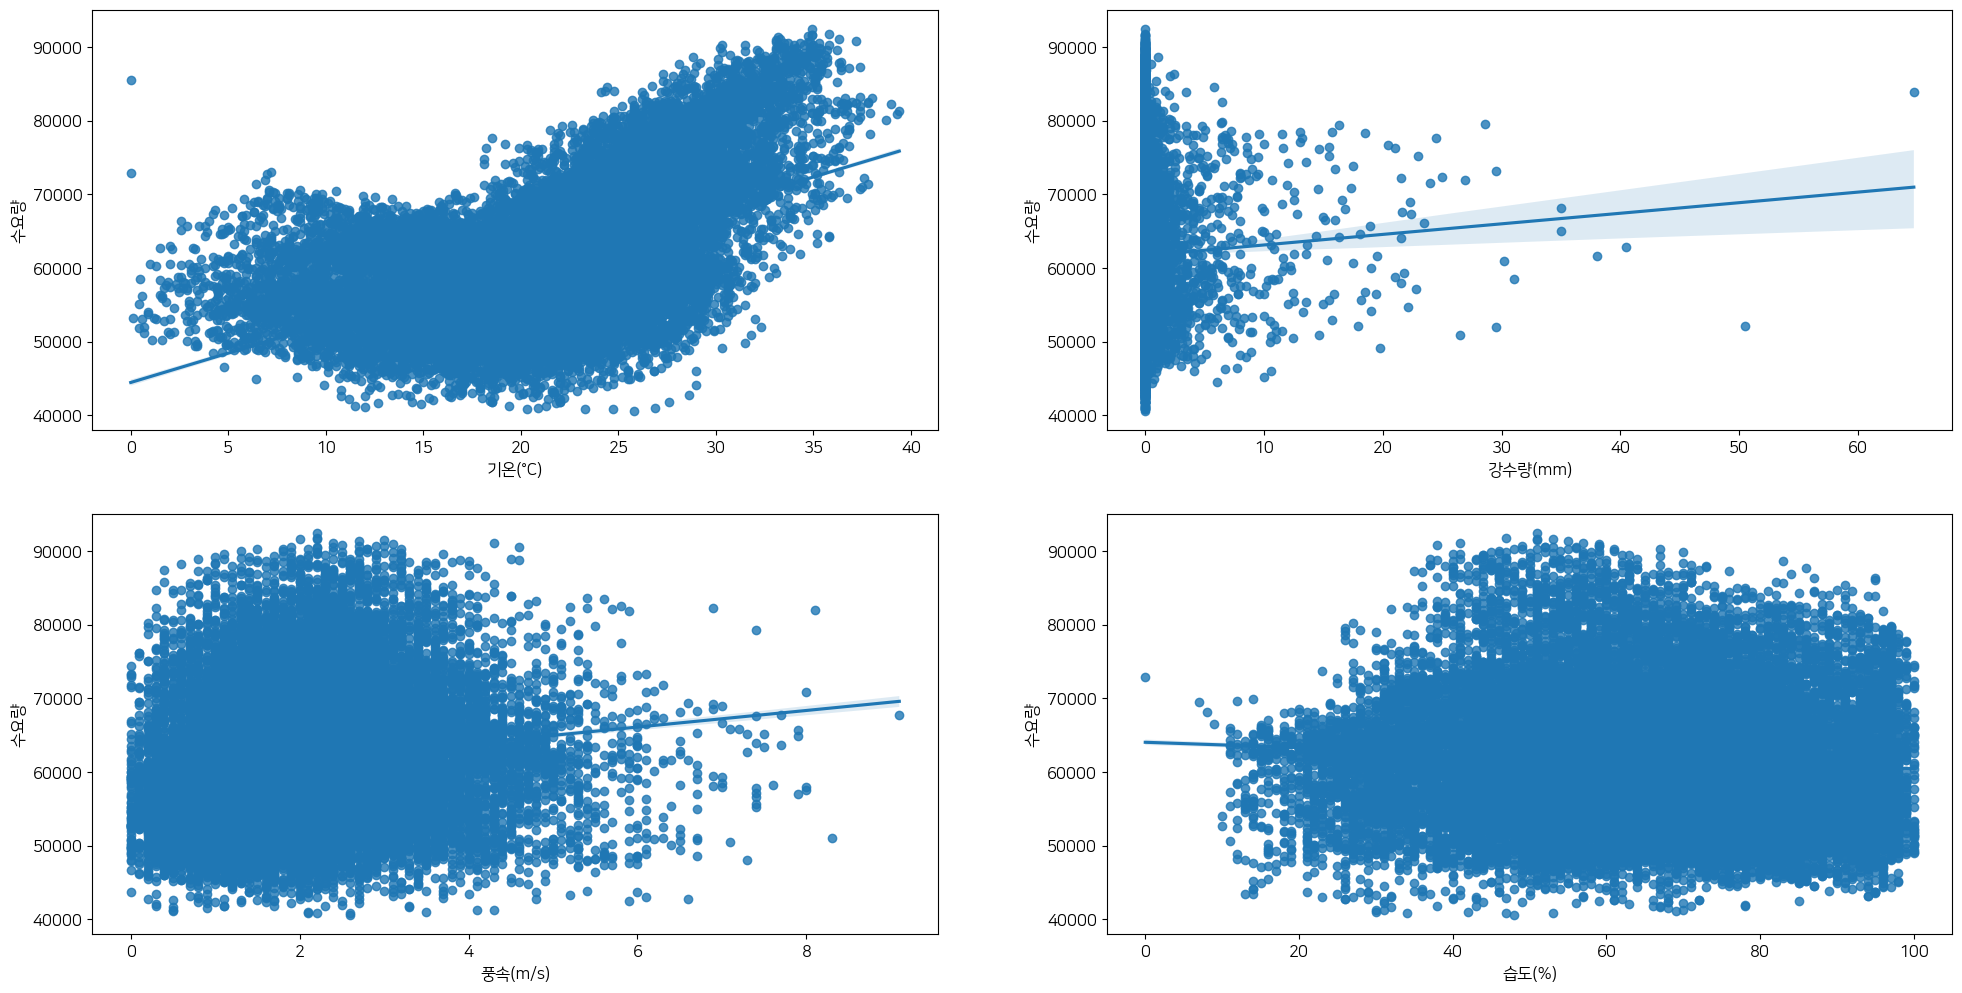

In [283]:
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin1721sum, ax=axs[row][col])

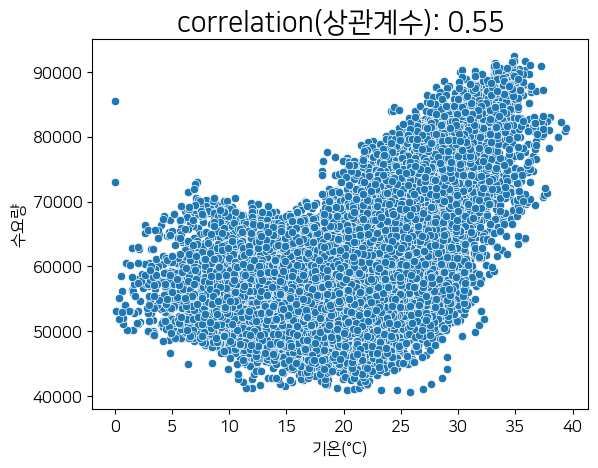

In [284]:
correlation = fin1721sum['수요량'].corr(fin1721sum['기온(°C)'])
sns.scatterplot(x=fin1721sum['기온(°C)'], y=fin1721sum['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [285]:
elec1721win.drop(['날짜'], axis=1, inplace=True)

In [286]:
fin1721win = pd.concat([tem1721win,elec1721win],axis=1)
fin1721win

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0      2017-01-01     0.2      0.0      2.2   79.0  00:00  59177
1      2017-01-01     0.0      0.0      1.4   78.0  01:00  59234
2      2017-01-01    -0.3      0.0      1.9   81.0  02:00  56664
3      2017-01-01    -0.7      0.0      2.0   84.0  03:00  54641
4      2017-01-01    -1.1      0.0      1.6   85.0  04:00  53749
...           ...     ...      ...      ...    ...    ...    ...
21859  2021-12-31    -6.4      0.0      2.2   34.0  19:00  74578
21860  2021-12-31    -6.3      0.0      4.1   35.0  20:00  72976
21861  2021-12-31    -6.7      0.0      4.8   36.0  21:00  71602
21862  2021-12-31    -7.5      0.0      3.0   37.0  22:00  69383
21863  2021-12-31    -7.7      0.0      2.9   38.0  23:00  68874

[21864 rows x 7 columns]

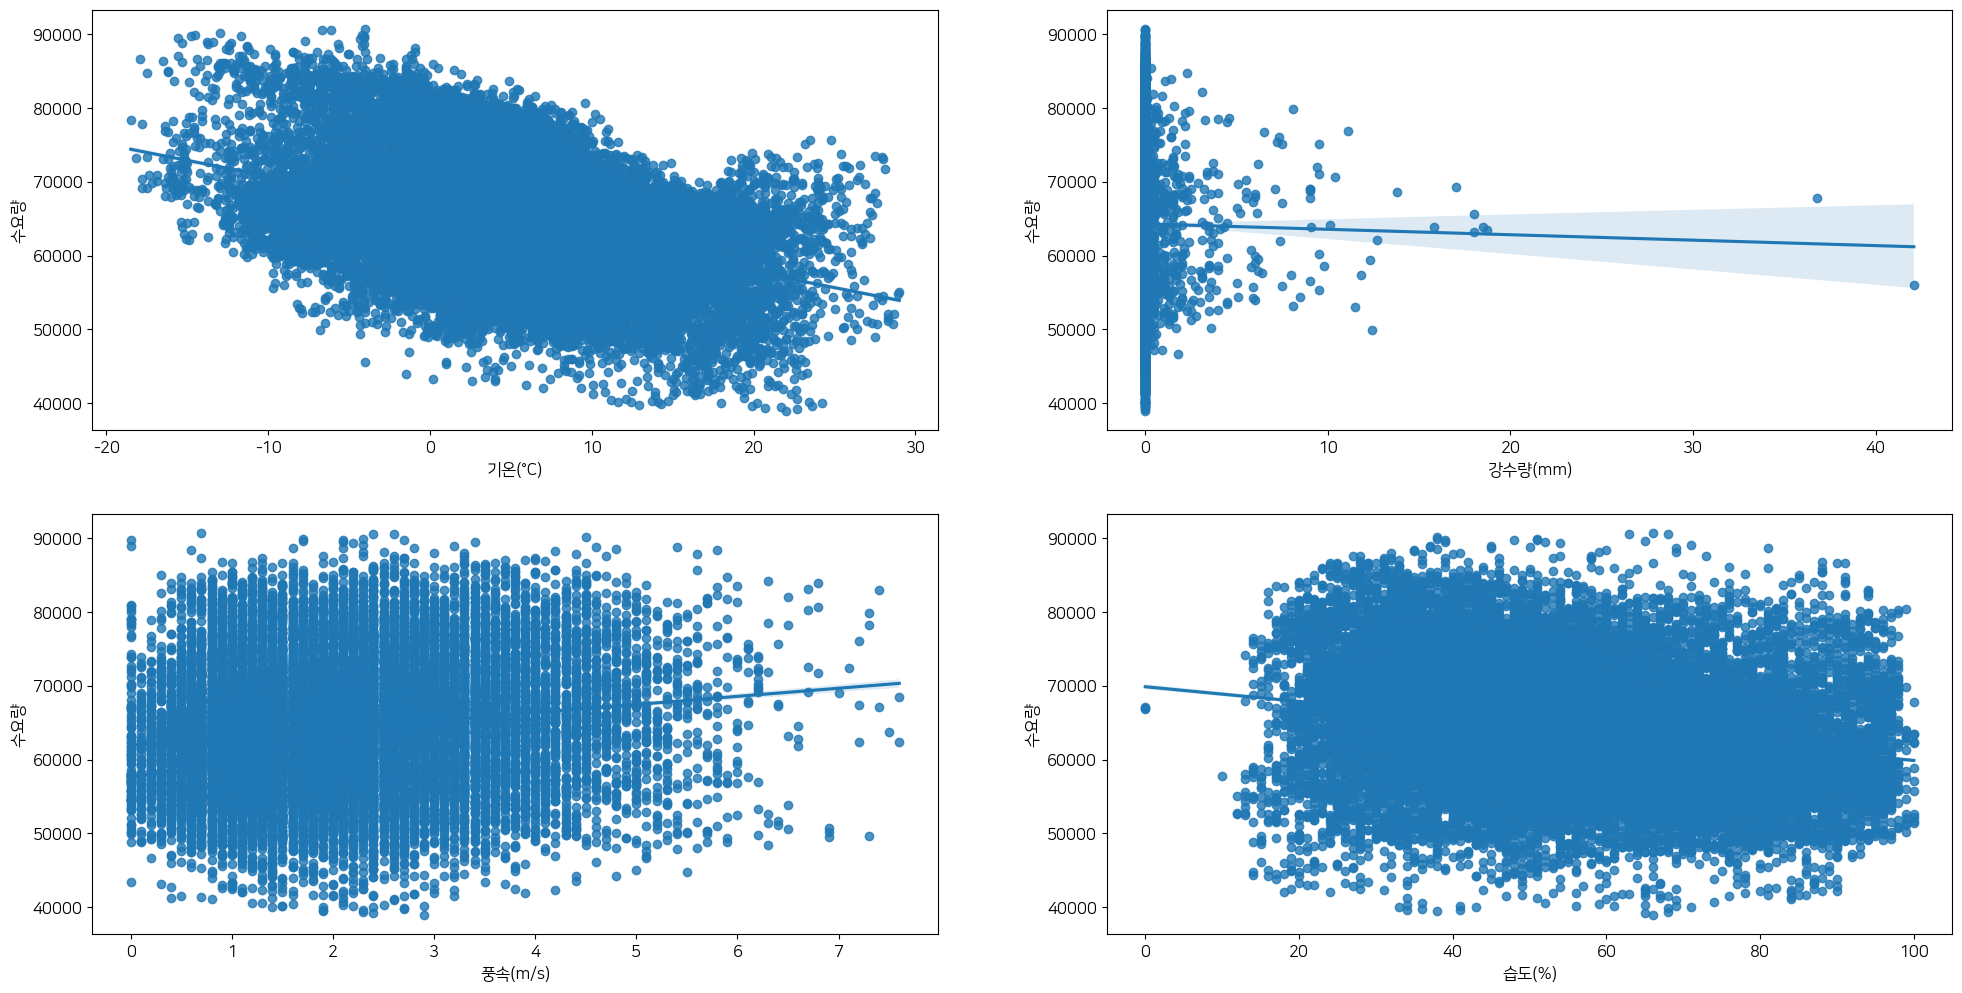

In [287]:
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin1721win, ax=axs[row][col])

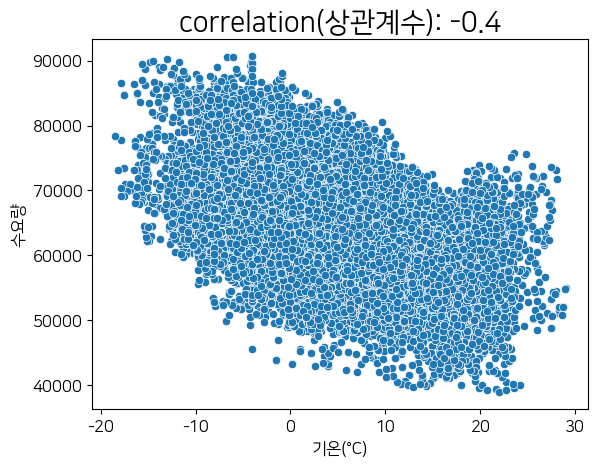

In [288]:
correlation = fin1721win['수요량'].corr(fin1721win['기온(°C)'])
sns.scatterplot(x=fin1721win['기온(°C)'], y=fin1721win['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [290]:
tem1721 = pd.read_csv("data/5년기온데이터_전처리.csv").drop(['Unnamed: 0'], axis=1)

In [302]:
tem17210608 = tem1721[tem1721['날짜'].str.contains(
    "2017-06|2017-07|2017-08|2018-06|2018-07|2018-08|2019-06|2019-07|2019-08|2020-06|2020-07|2020-08|2021-06|2021-07|2021-08")].reset_index()
tem17210608.drop('index',axis=1, inplace=True)
tem17210608.info()
# tem17210608.to_csv('tem17210608.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       11040 non-null  object 
 1   시간       11040 non-null  object 
 2   기온(°C)   11040 non-null  float64
 3   강수량(mm)  11040 non-null  float64
 4   풍속(m/s)  11040 non-null  float64
 5   습도(%)    11040 non-null  float64
dtypes: float64(4), object(2)
memory usage: 517.6+ KB


In [304]:
tem17210608 = tem17210608[tem17210608["기온(°C)"] > 12]

In [305]:
elec1721=pd.read_csv("data/fintime17_21_df.csv")

In [306]:
elec17210608 = elec1721[elec1721['날짜'].str.contains(
    "2017-06|2017-07|2017-08|2018-06|2018-07|2018-08|2019-06|2019-07|2019-08|2020-06|2020-07|2020-08|2021-06|2021-07|2021-08")].reset_index()
elec17210608.drop('index',axis=1, inplace=True)
elec17210608

날짜     시간    수요량
0      2017-06-01  00:00  58038
1      2017-06-01  01:00  54763
2      2017-06-01  02:00  52836
3      2017-06-01  03:00  51956
4      2017-06-01  04:00  51299
...           ...    ...    ...
11035  2021-08-31  19:00  74786
11036  2021-08-31  20:00  74099
11037  2021-08-31  21:00  71232
11038  2021-08-31  22:00  68114
11039  2021-08-31  23:00  64780

[11040 rows x 3 columns]

In [307]:
tem17210608.drop(['시간'], axis=1, inplace=True)
elec17210608.drop(['날짜'], axis=1, inplace=True)

In [308]:
fin17210608 = pd.concat([tem17210608,elec17210608],axis=1)
fin17210608

날짜  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)     시간    수요량
0      2017-06-01    21.4      0.0      1.8   74.0  00:00  58038
1      2017-06-01    21.5      0.0      0.9   75.0  01:00  54763
2      2017-06-01    21.3      0.0      1.7   77.0  02:00  52836
3      2017-06-01    20.9      0.0      2.4   81.0  03:00  51956
4      2017-06-01    20.6      0.0      1.1   82.0  04:00  51299
...           ...     ...      ...      ...    ...    ...    ...
11036  2021-08-31    18.1      1.6      4.3   99.0  20:00  74099
11037  2021-08-31    18.1      3.6      3.8   99.0  21:00  71232
11038  2021-08-31    18.3      2.1      3.3  100.0  22:00  68114
11039  2021-08-31    18.5      7.8      2.6  100.0  23:00  64780
8701          NaN     NaN      NaN      NaN    NaN  13:00  85536

[11040 rows x 7 columns]

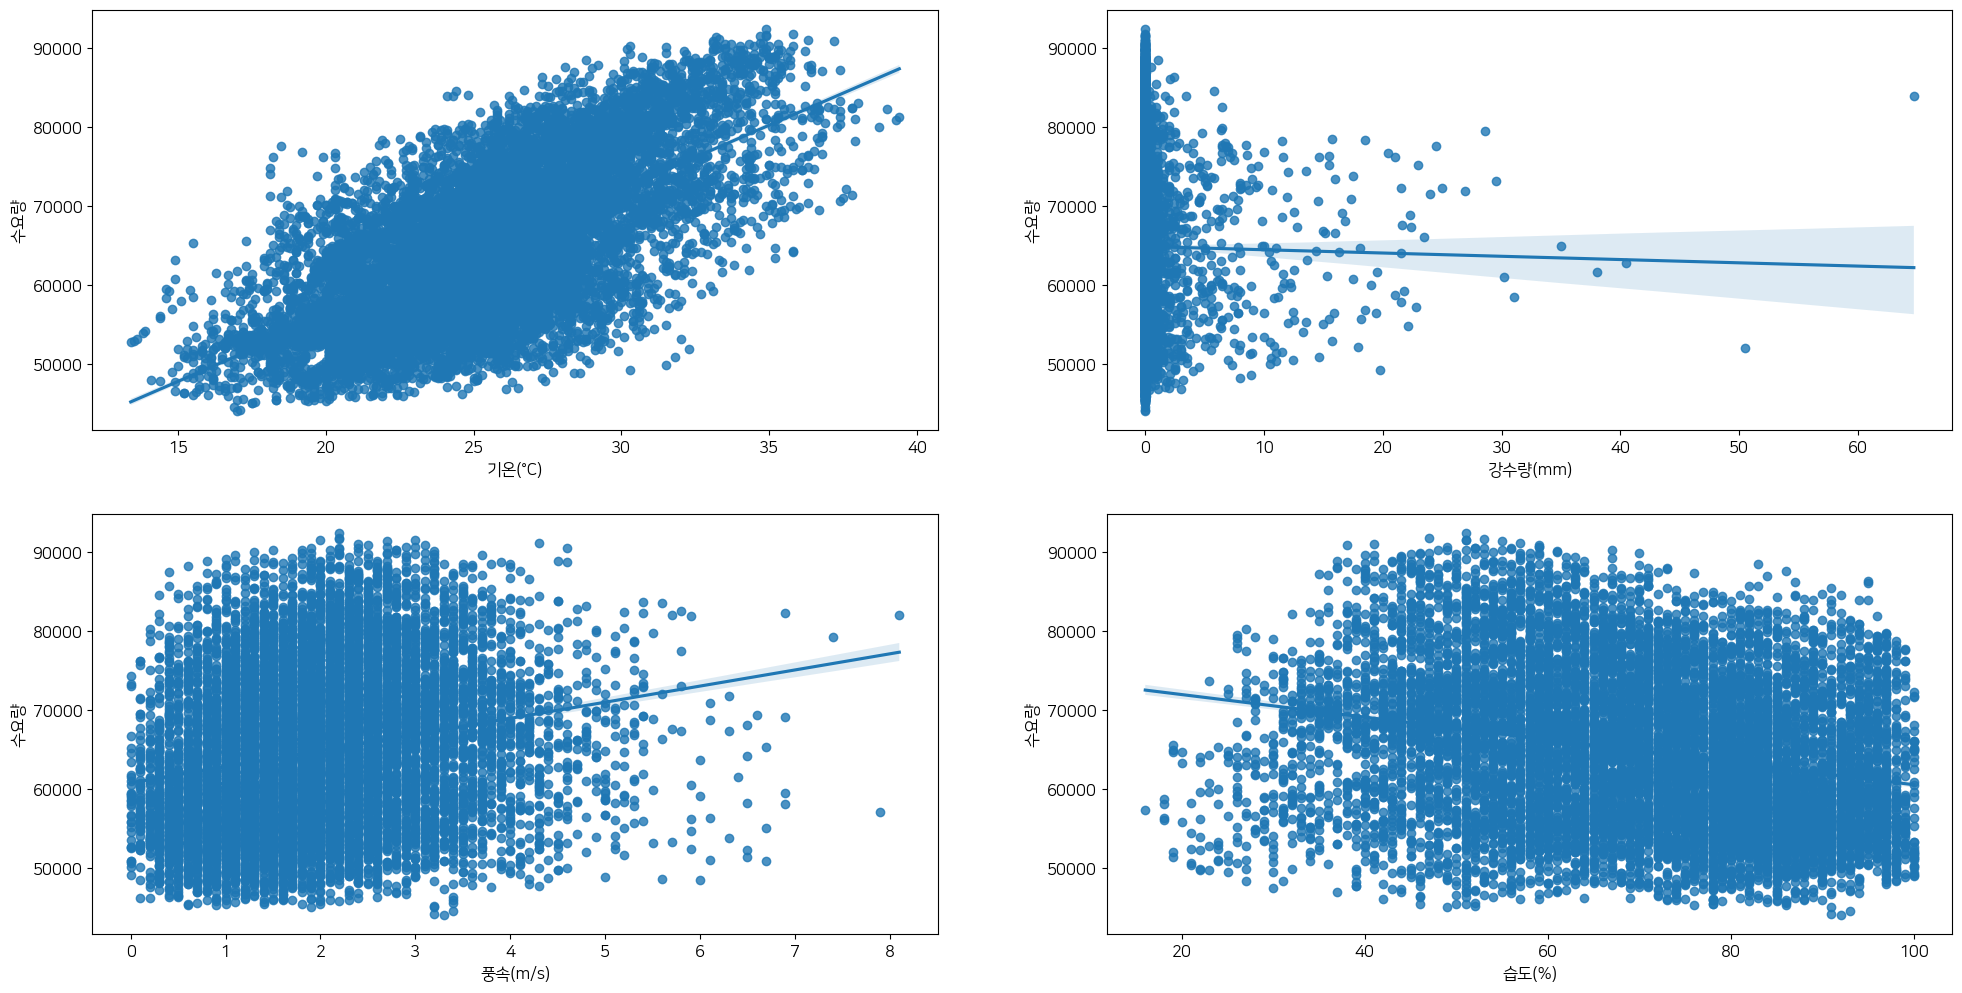

In [309]:
fig, axs = plt.subplots(figsize=(24, 12), ncols=2, nrows=2)
lm_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y='수요량', data=fin17210608, ax=axs[row][col])

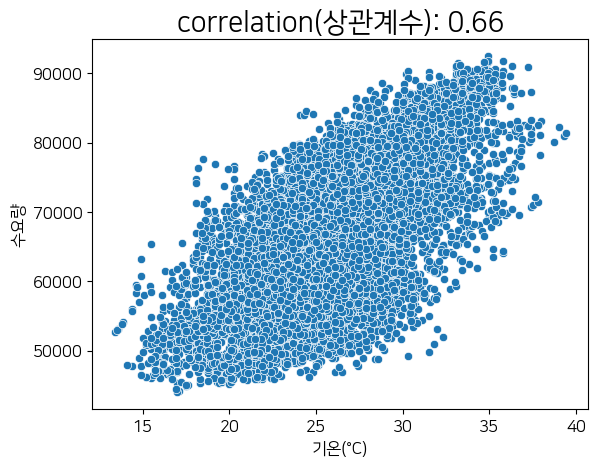

In [310]:
correlation = fin17210608['수요량'].corr(fin17210608['기온(°C)'])
sns.scatterplot(x=fin17210608['기온(°C)'], y=fin17210608['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()